In [1]:
import pandas as pd
a=pd.read_csv("/content/Employee_Performance.csv")
print(a)

       Employee_ID        Department  Gender  Age   Job_Title Hire_Date  \
0                1                IT    Male   55  Specialist   03:05.6   
1                2           Finance    Male   29   Developer   03:05.6   
2                3           Finance    Male   55  Specialist   03:05.6   
3                4  Customer Support  Female   48     Analyst   03:05.6   
4                5       Engineering  Female   36     Analyst   03:05.6   
...            ...               ...     ...  ...         ...       ...   
59952        59953           Finance  Female   30  Technician   03:05.6   
59953        59954                IT  Female   54     Manager   03:05.6   
59954        59955        Operations  Female   33     Manager   03:05.6   
59955        59956                HR    Male   60   Developer   03:05.6   
59956        59957                HR  Female   48  Consultant   03:05.6   

       Years_At_Company Education_Level  Unnamed: 8  Monthly_Salary  \
0                     2     

In [2]:
a.isnull().sum()

Employee_ID                        0
Department                         0
Gender                             0
Age                                0
Job_Title                          0
Hire_Date                          0
Years_At_Company                   0
Education_Level                    0
Unnamed: 8                     59957
Monthly_Salary                     0
Work_Hours_Per_Week                0
Projects_Handled                   0
Overtime_Hours                     0
Sick_Days                          0
Remote_Work_Frequency              0
Team_Size                          0
Training_Hours                     0
Promotions                         1
Employee_Satisfaction_Score        1
Performance_Score                  1
dtype: int64

In [8]:
a["Promotions"]=a["Promotions"].fillna(0)
a["Employee_Satisfaction_Score"]=a["Employee_Satisfaction_Score"].fillna(0)
a["Performance_Score"]=a["Performance_Score"].fillna(0)

In [9]:
if 'Unnamed: 8' in a.columns:
    a = a.drop(['Unnamed: 8'], axis=1)
    print(a)
else:
    print("Column 'Unnamed: 8' not found in the DataFrame.")

Column 'Unnamed: 8' not found in the DataFrame.


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a['Department']=le.fit_transform(a['Department'])
a["Gender"]=le.fit_transform(a["Gender"])
a['Job_Title']=le.fit_transform(a['Job_Title'])
a['Hire_Date']=le.fit_transform(a['Hire_Date'])
a["Education_Level"]=le.fit_transform(a["Education_Level"])
a["Employee_Satisfaction_Score"]=le.fit_transform(a["Employee_Satisfaction_Score"])
print(a)

       Employee_ID  Department  Gender  Age  Job_Title  Hire_Date  \
0                1           4       1   55          5          0   
1                2           2       1   29          2          0   
2                3           2       1   55          5          0   
3                4           0       0   48          0          0   
4                5           1       0   36          0          0   
...            ...         ...     ...  ...        ...        ...   
59952        59953           2       0   30          6          0   
59953        59954           4       0   54          4          0   
59954        59955           7       0   33          4          0   
59955        59956           3       1   60          2          0   
59956        59957           3       0   48          1          0   

       Years_At_Company  Education_Level  Monthly_Salary  Work_Hours_Per_Week  \
0                     2                1            6750                   33   
1        

In [10]:
x=a.drop(["Performance_Score"],axis=1)
y=a["Performance_Score"]
print(x)
print(y)

       Employee_ID  Department  Gender  Age  Job_Title  Hire_Date  \
0                1           4       1   55          5          0   
1                2           2       1   29          2          0   
2                3           2       1   55          5          0   
3                4           0       0   48          0          0   
4                5           1       0   36          0          0   
...            ...         ...     ...  ...        ...        ...   
59952        59953           2       0   30          6          0   
59953        59954           4       0   54          4          0   
59954        59955           7       0   33          4          0   
59955        59956           3       1   60          2          0   
59956        59957           3       0   48          1          0   

       Years_At_Company  Education_Level  Monthly_Salary  Work_Hours_Per_Week  \
0                     2                1            6750                   33   
1        

In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)
x=pd.DataFrame(data=x,columns=['col1','col2'])
print(x)

               col1         col2
0     -29978.029052   343.586848
1     -29977.093366  1093.576835
2     -29975.953992  -556.410343
3     -29974.871661 -1606.420335
4     -29973.873268 -1606.424012
...             ...          ...
59952  29974.128334 -1501.486031
59953  29974.929699   798.493793
59954  29975.984002   198.503892
59955  29976.987017    98.491306
59956  29977.899001  1298.519564

[59957 rows x 2 columns]


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train)

print(y_train)

               col1         col2
3114  -26864.067992   793.838776
17985 -11992.792888 -2554.947986
33813   3834.989203   196.376881
28940  -1037.816633 -2204.034741
17698 -12280.010642   195.054147
...             ...          ...
24891  -5087.065673   795.624934
4612  -25365.920610 -1006.039953
28016  -1962.030496   345.879687
47275  17297.163130 -2002.540397
5147  -24830.903777 -1155.988627

[47965 rows x 2 columns]
3114     2.0
17985    1.0
33813    1.0
28940    2.0
17698    1.0
        ... 
24891    2.0
4612     2.0
28016    5.0
47275    1.0
5147     5.0
Name: Performance_Score, Length: 47965, dtype: float64


In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(y_pred)

[3. 5. 3. ... 3. 5. 1.]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
data=lr.predict([[8.95,507]])
print(data)

[3.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1074  322 1068    0    0]
 [ 739  341  655  659    0]
 [ 719    0  622  351  668]
 [ 334    0  780  222 1025]
 [ 345    0  737  296 1035]]


In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.27468312208138757


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.33      0.44      0.38      2464
         2.0       0.51      0.14      0.22      2394
         3.0       0.16      0.26      0.20      2360
         4.0       0.15      0.09      0.11      2361
         5.0       0.38      0.43      0.40      2413

    accuracy                           0.27     11992
   macro avg       0.31      0.27      0.26     11992
weighted avg       0.31      0.27      0.27     11992



(array([1.0000e+00, 0.0000e+00, 1.2146e+04, 0.0000e+00, 1.1923e+04,
        0.0000e+00, 1.1903e+04, 0.0000e+00, 1.1952e+04, 1.2032e+04]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

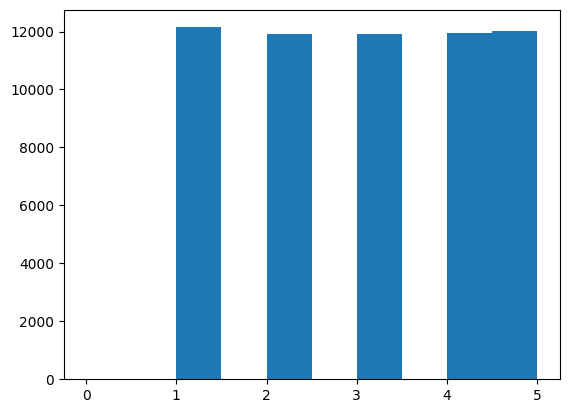

In [18]:
from matplotlib import pyplot as plt
plt.hist(a["Performance_Score"])